### Results:

We attempted several models, notably one where we expect 162 predictions for each piece of audio, and another where we only expect 8 predictions for each piece of audio. 162 was the max_target_length across all files, however, not all songs have 162 sentences, and both training and validation accuracy were not significant. Therefore, we naively assumed all files have around 8 sentence starts, and truncated ground truth Y to 8 sentences per audio, and proceeded with a CNN that has a last layer output size of 8.

First, there is a usual behaviour of the loss going up while accuracy improves. We suspect that since each of the 8 predictions contributes to the overall loss, if the model predicts the correct classes with low confidence, the accuracy metric (which only cares about the predicted class) improves, but the loss remains high.

Second, there seem to be too much drop-out (0.5) as validation is performing better than training. This could be due to too much weight parameters are set to zero to avoid overfitting during training, and thus leads to a seemingly bad training accuracy; while during validation this is no drop-out, and thus the better accuracy. For future work, we will employ a lower drop-out rate.

In [ ]:
input_1 = 'file_input_uploads/acc.png'

In [ ]:
input_2 = 'file_input_uploads/loss.png'

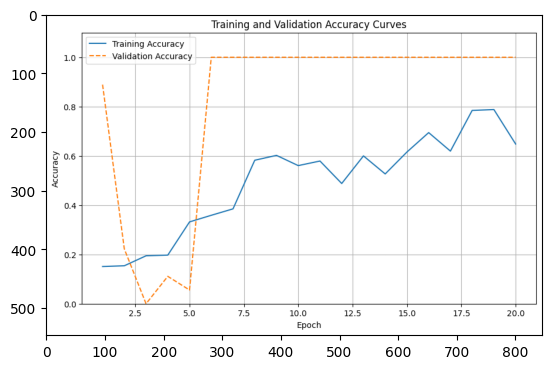

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the PNG image
image = mpimg.imread(input_1)
plt.imshow(image)
plt.show()

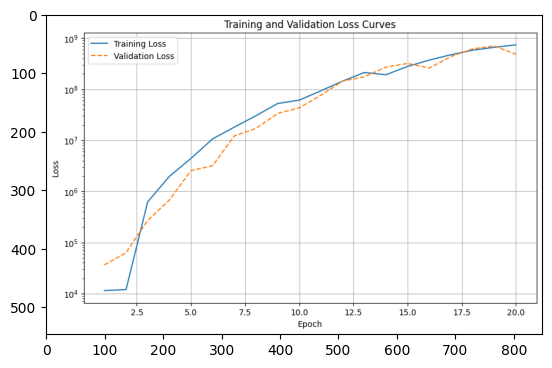

In [ ]:
image = mpimg.imread(input_2)
plt.imshow(image)
plt.show()

### Reflections:

First, framing time stamp predictions as a classification problem rather than regression is problematic even though we have previously employed a classification paradigm for continuous tempo estimation in previous coursework for ease of convergence. Each input 𝑋 generates multiple predictions 𝑦_1, ... y_8, each of which is a multi-class prediction. The loss is calculated across all predictions and aggregated, potentially amplifying small errors. Framing the problem as classification rather than regression means we are using a categorical cross-entropy loss that penalizes predictions based on confidence, rather than a regression-based loss (e.g., mean squared error) that penalizes based on closeness to the target.

Second, we are constraint to fixed output length (8 start times for each piece of audio) with CNN. However, different audio pieces have different number of sentence start time stamps. Therefore, we propose the corresponding fix in the section below.

(Lastly, we constantly encountered Dataset, RAM, and GPU issues during the project. Lesson learned: It is wiser not to take on a project of this scale during and post-ISMIR.)

### Sequence-to-Sequence Encoder-Decoder Network for Audio Feature-to-Time Prediction:

We propose using a transformer-based encoder-decoder architecture for audio feature-to-sequential start time prediction. The model will take audio features as input, represented as a sequence of vectors with shape
(batch size,sequence length,feature dimension) and output a sequence of start times in seconds, with variable lengths depending on the number of start times in each audio file. The encoder will process the audio features using self-attention to learn temporal relationships and output a latent representation of the input sequence. The decoder will auto-regressively predict start times by leveraging the encoder's output and its previous predictions. This setup would finally allow the us to efficiently handle variable-length outputs while leveraging the attention mechanism's strength in modeling sequential dependencies.